In [ ]:
import pandas as pd

df = pd.read_csv('transactions.csv')
print(df.head())
print(df.info())


# Convert 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Convert 'TransactionType' column to lowercase
df['TransactionType'] = df['TransactionType'].str.lower()

# Check for unique TransactionIDs
if df['TransactionID'].nunique() != len(df):
    print("Duplicate TransactionIDs found. Dropping duplicates.")
    df = df.drop_duplicates(subset='TransactionID')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values (if any)
# For example, drop rows with missing values
df = df.dropna()

# Check for negative amounts or outliers in 'Amount' column
outliers = df[df['Amount'] < 0]
if not outliers.empty:
    print("Negative amounts found. Investigate and handle them.")

# Display the cleaned DataFrame
print(df.head())


  TransactionID        Date TransactionType  Amount
0          T001  01-04-2023         Deposit    2000
1          T002  01-04-2023      Withdrawal     150
2          T003  02-04-2023         Payment     450
3          T004  02-04-2023         Deposit    1750
4          T005  03-04-2023      Withdrawal     300
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    15 non-null     object
 1   Date             15 non-null     object
 2   TransactionType  15 non-null     object
 3   Amount           15 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 608.0+ bytes
None
Missing Values:
TransactionID      0
Date               0
TransactionType    0
Amount             0
dtype: int64
  TransactionID       Date TransactionType  Amount
0          T001 2023-04-01         deposit    2000
1          T002 2023-04-01      withdrawa

In [ ]:
# Install required libraries
!pip install pyspark

# Import PySpark
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("TransactionAnalysis") \
    .getOrCreate()

# Load the dataset into a PySpark DataFrame
df_spark = spark.read.csv('transactions.csv', header=True, inferSchema=True)

# Display the schema of the DataFrame
df_spark.printSchema()

# Display the first few rows of the DataFrame
df_spark.show(5)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=513a7169c56ec94e21f72ccc0f015622235f27243680d768a33b874d9c892ab3
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
root
 |-- TransactionID: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- TransactionType: string (nullable = true)
 |-- Amount: integer (nullable = true)

+-------------+----------+---------------+------+
|TransactionID|      Date|TransactionType|Amount|
+-------------+----------+---------------+------+
|         T001|01-04-2023|        Deposit|  2000|
|         T002|01-04-2023|     Withdrawal|   150|
|         T003|02-04-2023|        Payment|   450|
|         T004|02-04-2023|        Deposit|  1750|
|         T005|03-04-2023|     Withdrawal|   300|
+---------

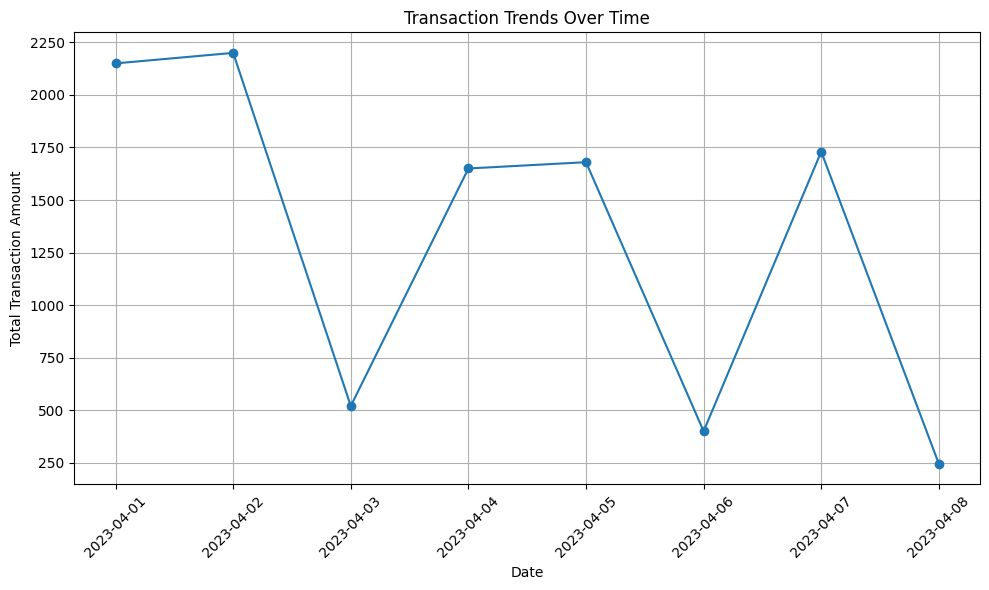

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime data type (if not already done)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Group the data by date and calculate the total transaction amount for each date
transaction_totals = df.groupby('Date')['Amount'].sum()

# Plot the transaction trends over time using a line plot
plt.figure(figsize=(10, 6))
plt.plot(transaction_totals.index, transaction_totals.values, marker='o', linestyle='-')
plt.title('Transaction Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
